Experiment of 7 november 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Faulty cluster associated to the faulty voltage signal against the nominal cluster

In [3]:
df_phi_0 = pd.read_csv('../../data/cell/ground/nominal_clusters/last/phi_0.csv')
df_phi_1 = pd.read_csv('../../data/cell/ground/nominal_clusters/last/phi_1.csv')
df_phi_2 = pd.read_csv('../../data/cell/ground/nominal_clusters/last/phi_2.csv')
df_phi_3 = pd.read_csv('../../data/cell/ground/nominal_clusters/last/phi_3.csv')

In [4]:
df_phi_2.describe()

,Soc,r0,r1,c,Temp,DBSCANclusters
count,330.000000,330.000000,330.000000,330.000000,330.0,330.0
mean,50.000000,0.002954,0.004150,33425.592006,25.0,2.0
std,31.670799,0.000454,0.001556,8679.575703,0.0,0.0
min,0.000000,0.002185,0.002400,11265.166531,25.0,2.0
25%,20.000000,0.002675,0.003229,28799.050011,25.0,2.0
50%,50.000000,0.002935,0.003794,33729.862441,25.0,2.0
75%,80.000000,0.003095,0.004497,39159.693726,25.0,2.0
max,100.000000,0.004643,0.011589,51837.815774,25.0,2.0


In [5]:
df_outliers = pd.read_csv('../esperiment_results/20241106_165324/chunk_7/outliers_set.csv')

In [6]:
df_outliers.describe()

,r0,r1,c
count,61.000000,61.000000,61.000000
mean,0.003531,0.003992,37831.087042
std,0.000532,0.001976,20442.985069
min,0.002447,-0.000028,18475.002858
25%,0.003198,0.003231,35512.530276
50%,0.003713,0.003530,35512.530282
75%,0.003884,0.004519,35512.530299
max,0.004919,0.017215,193982.019470


In [7]:
df_phi = pd.read_csv('../esperiment_results/20241106_165324/chunk_7/phi_3.csv')

In [8]:
df_phi.describe()

,r0,r1,c
count,58.000000,58.000000,58.000000
mean,0.003741,0.003303,35512.530279
std,0.000085,0.000218,0.000019
min,0.003513,0.002891,35512.530222
25%,0.003708,0.003231,35512.530276
50%,0.003729,0.003336,35512.530280
75%,0.003826,0.003494,35512.530286
max,0.003870,0.003643,35512.530315


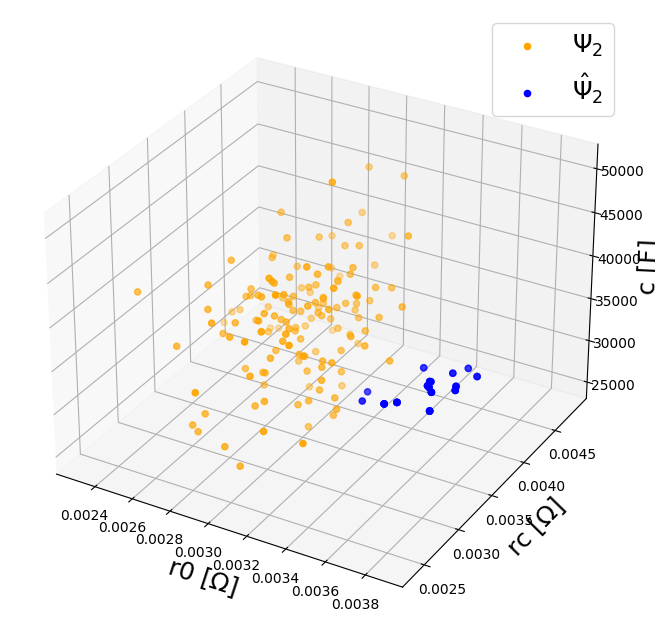

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(df_phi_3['r0'], df_phi_3['r1'], df_phi_3['c'], color='red', label='nominal cluster 3')
ax.scatter(df_phi_2['r0'], df_phi_2['r1'], df_phi_2['c'], color='orange', label=r'$\Psi_2$')
#ax.scatter(df_phi_1['r0'], df_phi_1['r1'], df_phi_1['c'], color='skyblue', label='nominal cluster 1')
#ax.scatter(df_phi_0['r0'], df_phi_0['r1'], df_phi_0['c'], color='magenta', label='nominal cluster 0')

ax.scatter(df_phi['r0'], df_phi['r1'], df_phi['c'], color='blue', label='$\hat{\Psi}_2$')

#ax.scatter(df_outliers['r0'], df_outliers['r1'], df_outliers['c'], color='red', label='outliers')

ax.set_xlabel('r0 [$\Omega$]', fontsize=18)
ax.set_ylabel('rc [$\Omega$]', fontsize=18)
ax.set_zlabel('c [F]', fontsize=18)
ax.legend(fontsize=18)
plt.savefig('PsiVersus2.png', format='png')
plt.show()

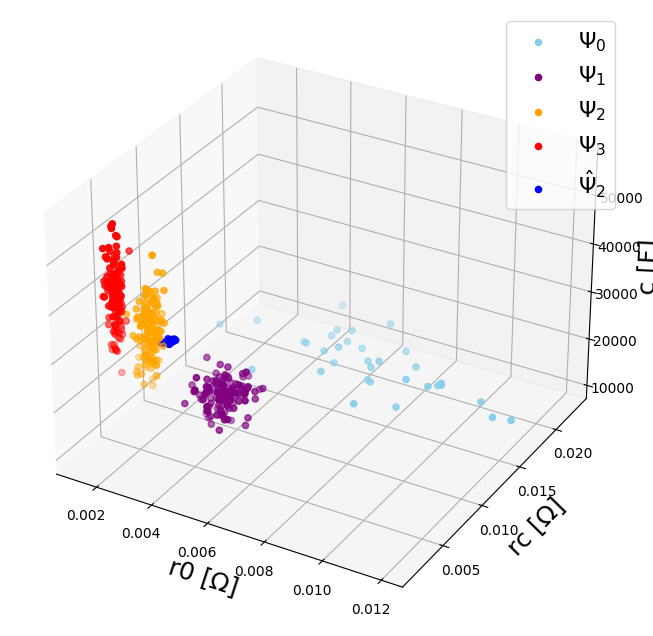

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_phi_0['r0'], df_phi_0['r1'], df_phi_0['c'], color='skyblue', label=r'$\Psi_0$')
ax.scatter(df_phi_1['r0'], df_phi_1['r1'], df_phi_1['c'], color='purple', label=r'$\Psi_1$')
ax.scatter(df_phi_2['r0'], df_phi_2['r1'], df_phi_2['c'], color='orange', label=r'$\Psi_2$')
ax.scatter(df_phi_3['r0'], df_phi_3['r1'], df_phi_3['c'], color='red', label=r'$\Psi_3$')

ax.scatter(df_phi['r0'], df_phi['r1'], df_phi['c'], color='blue', label='$\hat{\Psi}_2$')

# Adding units with proper physics symbols
ax.set_xlabel(r'r0 [$\Omega$]', fontsize=18)
ax.set_ylabel(r'rc [$\Omega$]', fontsize=18)
ax.set_zlabel(r'c [F]', fontsize=18)

ax.legend(fontsize=16)

plt.savefig('faultyInducedByOutliers.png', format='png')
plt.show()


## Voltage following:"Reconstruction error"

In [13]:
def average_percentage_error(signal1, signal2):
    min_length = min(len(signal1), len(signal2))
    signal1 = signal1[:min_length]
    signal2 = signal2[:min_length]
    percentage_error = np.abs((signal1 - signal2) / signal1) * 100
    average_error = np.mean(percentage_error)
    print(f'Average Percentage Error: {average_error:.4f}%')

In [14]:
df_ground_faulty_voltage = pd.read_csv('../../data/cell/ground/signals/the_end/ground_series_with_faulty_on_voltage.csv')

Recall that the faulty has been injected from 700.000 to 2500000
=> hence it must  be the 5th chunk

In [15]:
print(len(df_ground_faulty_voltage))

7940000


RMK: qua l'esperimento è andato avanti piu' del dovuto

In [16]:
df_dt_results_chunk_1 = pd.read_csv('../esperiment_results/20241106_165324/chunk_7/dt_results_7.csv')
df_dt_results_chunk_2 = pd.read_csv('../esperiment_results/20241106_165324/chunk_2/dt_results_2.csv')
# 1+2 dovrebbe coprie da indice 500.000 fino a indice 1.500.000 mln
df_dt_results_chunk_5 = pd.read_csv('../esperiment_results/20241106_165324/chunk_5/dt_results_5.csv')
df_dt_results_chunk_6 = pd.read_csv('../esperiment_results/20241106_165324/chunk_6/dt_results_6.csv')

In [17]:
df_dt_1_2_concatenated = pd.concat([df_dt_results_chunk_1, df_dt_results_chunk_2], ignore_index=True)

In [18]:
voltage_dt_evolutive_when_faulty_starts = df_dt_1_2_concatenated.iloc[200000:700001]['voltage'].values
# IMP. gli indici sono selezionati cosi' perchè sono vengono resettati  dopo la concatenzaione
voltage_dt_5 = df_dt_results_chunk_5['voltage']
voltage_dt_6 = df_dt_results_chunk_6['voltage']

In [19]:
print(len(voltage_dt_evolutive_when_faulty_starts))

500001


## The following is the first window in which the faulty occours

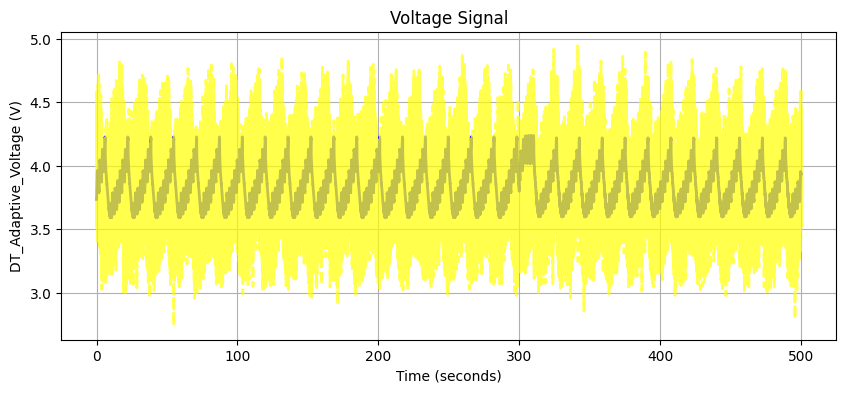

In [20]:
#voltage_signal = voltage_dt_1.values
ground_voltage = df_ground_faulty_voltage['voltage'].iloc[700000:1200001].values
fs = 1000  # Define your sampling frequency
time_vector = np.linspace(0, len(ground_voltage) / fs, len(ground_voltage))
plt.figure(figsize=(10, 4))  # Set the figure size
plt.plot(time_vector, voltage_dt_evolutive_when_faulty_starts,label='DT Evolutive', color='blue', linestyle='-', linewidth=2, alpha=0.8)  # Plot the voltage signal against time
plt.plot(time_vector, ground_voltage, label='Real voltage', color='yellow', linestyle='--', linewidth=2, alpha=0.7)
plt.title('Voltage Signal')  # Add a title
plt.xlabel('Time (seconds)')  # Label the x-axis
plt.ylabel('DT_Adaptive_Voltage (V)')  # Label the y-axis
plt.grid()  # Add a grid for better readability
plt.savefig('before.png')
plt.show()  # Display the plot

In [21]:
ground_voltage = df_ground_faulty_voltage['voltage'].iloc[700000:1200001].values
voltage_dt_evolutive_when_faulty_starts = df_dt_1_2_concatenated.iloc[200000:700001]['voltage'].values
average_percentage_error(signal1=ground_voltage, signal2=voltage_dt_evolutive_when_faulty_starts)

Average Percentage Error: 5.6771%


After

/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


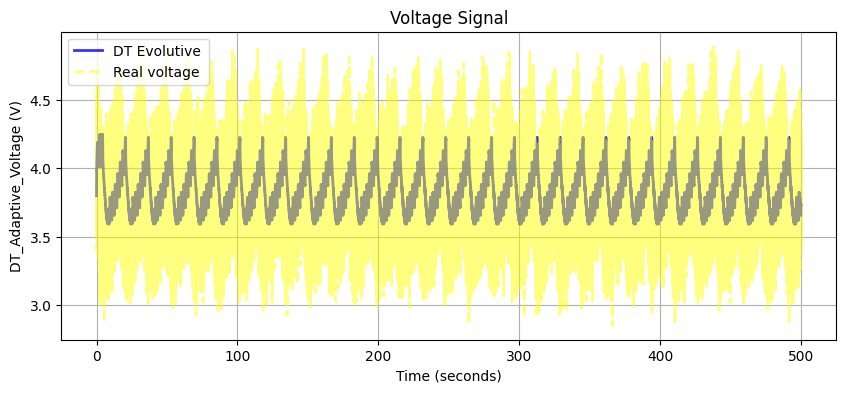

In [22]:
voltage_signal = voltage_dt_5.values
ground_voltage = df_ground_faulty_voltage['voltage'].iloc[2000000:2500001].values
fs = 1000  # Define your sampling frequency
time_vector = np.linspace(0, len(voltage_signal) / fs, len(voltage_signal))
plt.figure(figsize=(10, 4))  # Set the figure size
plt.plot(time_vector, voltage_signal,label='DT Evolutive', color='blue', linestyle='-', linewidth=2, alpha=0.8)  # Plot the voltage signal against time
plt.plot(time_vector, ground_voltage, label='Real voltage ', color='yellow', linestyle='--', linewidth=2, alpha=0.5)
plt.title('Voltage Signal')  # Add a title
plt.xlabel('Time (seconds)')  # Label the x-axis
plt.ylabel('DT_Adaptive_Voltage (V)')  # Label the y-axis
plt.grid()  # Add a grid for better readability
plt.legend()
plt.savefig('after.png')
plt.show()  # Display the plot


In [23]:
voltage_signal = voltage_dt_5.values
ground_voltage = df_ground_faulty_voltage['voltage'].iloc[2000000:2500001].values
average_percentage_error(signal1=ground_voltage, signal2=voltage_signal)

Average Percentage Error: 5.9781%


## Test to be passed:

1. dt_NON_evolutivo
2. segnale reale
3. dt_evolutivo

In [24]:
df_dataset_0 = pd.read_csv('fixed_params/dataset_0.csv')

In [25]:
df_dataset_0.describe()

,time,soc,soh,c_max,voltage,current,power,v_oc,r0,r1,c,v_r0,v_rc,i_r1,i_c,temperature,heat
count,2.500000e+06,2.500000e+06,2500000.0,2500000.0,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,1.274475e+06,6.804900e-01,1.0,20.0,3.851309e+00,-3.548745e-02,8.235776e-01,3.851010e+00,3.415000e-03,4.790000e-03,3.333996e+04,-1.211896e-04,-1.762453e-04,-3.679443e-02,1.306984e-03,2.993903e+02,6.780917e-01
std,7.358196e+05,1.743325e-01,0.0,0.0,1.561280e-01,9.692950e+00,3.755175e+01,1.339268e-01,2.688822e-17,1.127570e-17,5.820767e-11,3.310143e-02,4.136587e-02,8.635881e+00,4.387492e+00,3.898387e-01,4.654004e-01
min,-1.000000e+00,3.770855e-01,1.0,20.0,3.583303e+00,-1.627550e+01,-4.854485e+01,0.000000e+00,3.415000e-03,4.790000e-03,3.333996e+04,-5.558083e-02,-6.788937e-02,-1.417315e+01,-1.687113e+01,2.981500e+02,0.000000e+00
25%,6.372368e+05,5.270061e-01,1.0,20.0,3.723821e+00,-8.131000e+00,-3.940450e+01,3.721122e+00,3.415000e-03,4.790000e-03,3.333996e+04,-2.776736e-02,-3.710202e-02,-7.745724e+00,-2.496339e+00,2.990688e+02,2.315179e-01
50%,1.274474e+06,6.767339e-01,1.0,20.0,3.837632e+00,-5.205000e-01,1.941022e+00,3.837859e+00,3.415000e-03,4.790000e-03,3.333996e+04,-1.777507e-03,-1.404896e-03,-2.932977e-01,6.129322e-02,2.994199e+02,6.191245e-01
75%,1.911713e+06,8.326500e-01,1.0,20.0,3.970422e+00,1.085500e+01,3.119227e+01,3.979492e+00,3.415000e-03,4.790000e-03,3.333996e+04,3.706983e-02,3.999857e-02,8.350433e+00,3.030119e+00,2.996756e+02,1.054211e+00
max,2.548951e+06,1.000000e+00,1.0,20.0,4.181167e+00,1.197650e+01,6.791349e+01,4.060077e+00,3.415000e-03,4.790000e-03,3.333996e+04,4.089975e-02,5.518787e-02,1.152148e+01,2.291309e+01,3.002369e+02,1.796275e+00


/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


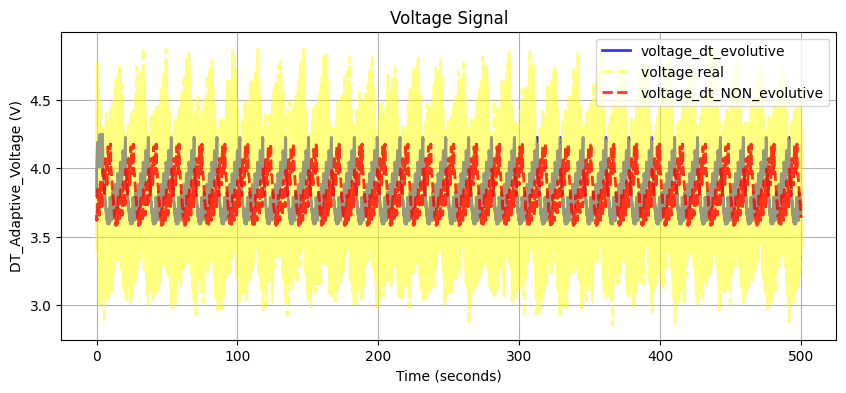

In [26]:
voltage_dt_evolutive = voltage_dt_5.values
voltage_dt_NON_evolutive = df_dataset_0['voltage'].iloc[1999999:2500000].values
ground_voltage = df_ground_faulty_voltage['voltage'].iloc[2000000:2500001].values
fs = 1000  # Define your sampling frequency
time_vector = np.linspace(0, len(voltage_signal) / fs, len(voltage_signal))
plt.figure(figsize=(10, 4))  # Set the figure size
plt.plot(time_vector, voltage_dt_evolutive, label='voltage_dt_evolutive', color='blue', linestyle='-', linewidth=2, alpha=0.8)  # Plot the voltage signal against time
plt.plot(time_vector, ground_voltage, label='voltage real', color='yellow', linestyle='--', linewidth=2, alpha=0.5)
plt.plot(time_vector, voltage_dt_NON_evolutive, label='voltage_dt_NON_evolutive', color='red', linestyle='--', linewidth=2, alpha=0.8)
plt.title('Voltage Signal')  # Add a title
plt.xlabel('Time (seconds)')  # Label the x-axis
plt.ylabel('DT_Adaptive_Voltage (V)')  # Label the y-axis
plt.grid()  # Add a grid for better readability
plt.savefig('after.png')
plt.legend()
plt.show()  # Display the plot


Mistake of the NON evolutive

In [27]:
average_percentage_error(signal1=ground_voltage, signal2=voltage_dt_NON_evolutive)

Average Percentage Error: 7.3188%


Mistake of the evolutive

In [28]:
average_percentage_error(signal1=ground_voltage, signal2=voltage_dt_evolutive)

Average Percentage Error: 5.9781%


## ZOOM IN:

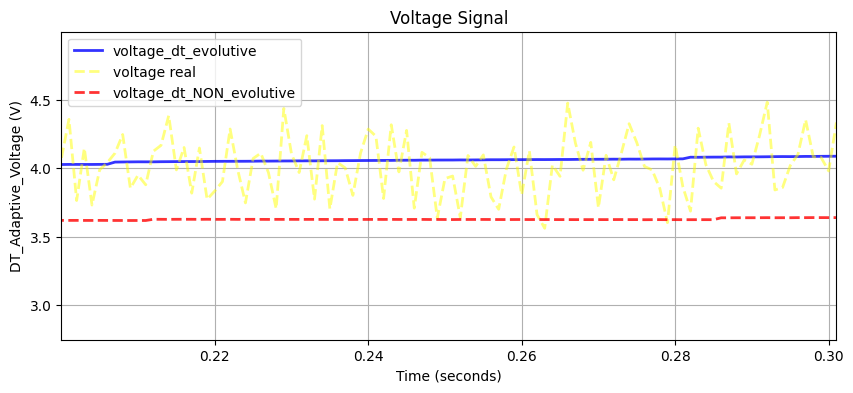

In [29]:
voltage_dt_evolutive = voltage_dt_5.values
voltage_dt_NON_evolutive = df_dataset_0['voltage'].iloc[1999999:2500000].values
ground_voltage = df_ground_faulty_voltage['voltage'].iloc[2000000:2500001].values
fs = 1000  # Define your sampling frequency
time_vector = np.linspace(0, len(voltage_signal) / fs, len(voltage_signal))
plt.figure(figsize=(10, 4))  # Set the figure size
plt.plot(time_vector, voltage_dt_evolutive, label='voltage_dt_evolutive', color='blue', linestyle='-', linewidth=2, alpha=0.8)  # Plot the voltage signal against time
plt.plot(time_vector, ground_voltage, label='voltage real', color='yellow', linestyle='--', linewidth=2, alpha=0.5)
plt.plot(time_vector, voltage_dt_NON_evolutive, label='voltage_dt_NON_evolutive', color='red', linestyle='--', linewidth=2, alpha=0.8)
plt.title('Voltage Signal')  # Add a title
plt.xlabel('Time (seconds)')  # Label the x-axis
plt.ylabel('DT_Adaptive_Voltage (V)')  # Label the y-axis
plt.grid()  # Add a grid for better readability
plt.savefig('after.png')
plt.legend()
plt.xlim([time_vector[200], time_vector[301]])
plt.savefig('pochissimisec.png')
plt.show()  # Display the plot

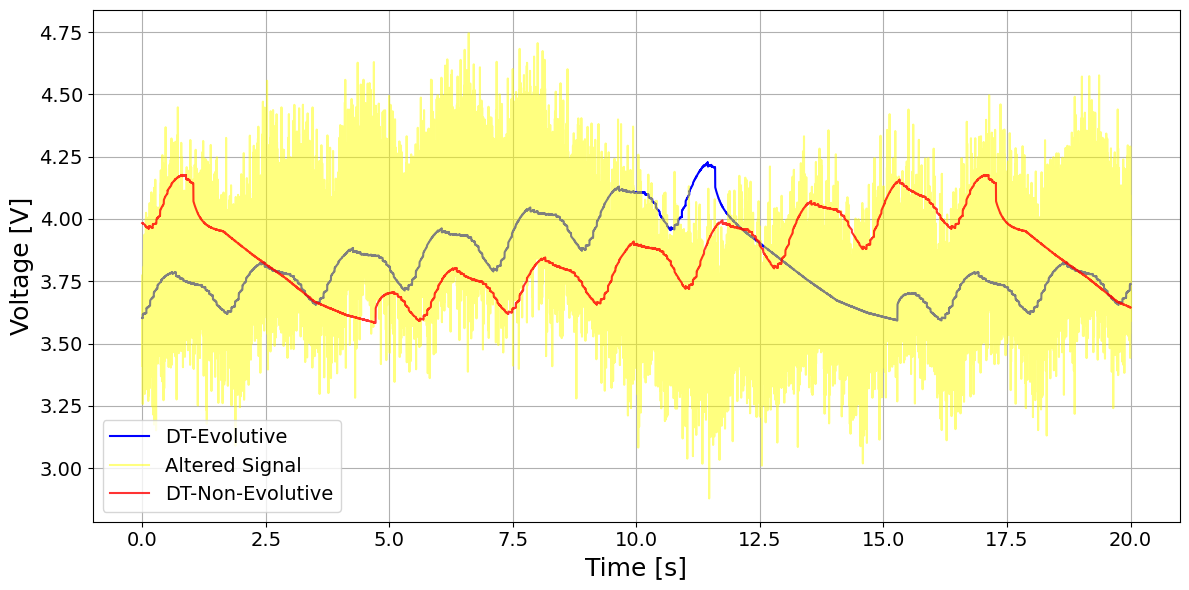

In [31]:
voltage_dt_evolutive = voltage_dt_5.iloc[-20000:].values
voltage_dt_NON_evolutive = df_dataset_0['voltage'].iloc[-20000:].values
ground_voltage = df_ground_faulty_voltage['voltage'].iloc[2500001-20000:2500001].values
fs = 1000  # Define your sampling frequency
time_vector = np.linspace(0, len(voltage_dt_evolutive) / fs, len(voltage_dt_evolutive))
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(time_vector, voltage_dt_evolutive, label='DT-Evolutive', color='blue')  # Plot the voltage signal against time
plt.plot(time_vector, ground_voltage, label='Altered Signal', color='yellow', alpha=0.5)
plt.plot(time_vector, voltage_dt_NON_evolutive, label='DT-Non-Evolutive', color='red', alpha=0.8)
plt.xlabel('Time [s]', fontsize=18)  # Label the x-axis
plt.ylabel('Voltage [V]', fontsize=18)  # Label the y-axis
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()  # Add a grid for better readability
plt.legend(fontsize=14, loc='lower left')
plt.savefig('adapt.png', format='png')
plt.tight_layout()
plt.show()  # Display the plot

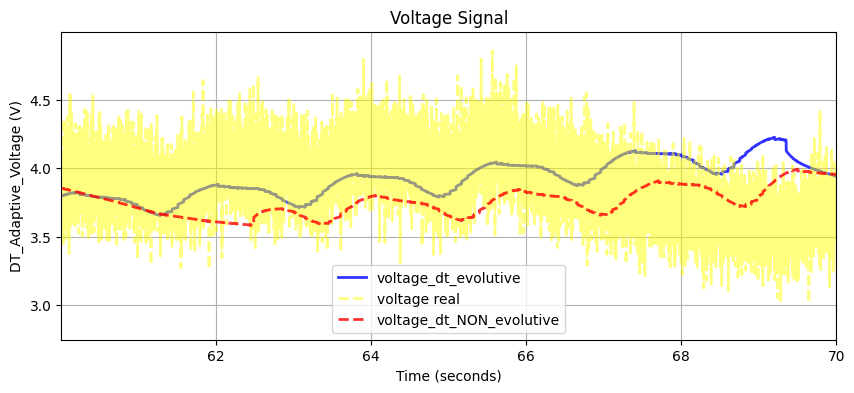

In [77]:
voltage_dt_evolutive = voltage_dt_5.values
voltage_dt_NON_evolutive = df_dataset_0['voltage'].iloc[1999999:2500000].values
ground_voltage = df_ground_faulty_voltage['voltage'].iloc[2000000:2500001].values
fs = 1000  # Define your sampling frequency
time_vector = np.linspace(0, len(voltage_signal) / fs, len(voltage_signal))
plt.figure(figsize=(10, 4))  # Set the figure size
plt.plot(time_vector, voltage_dt_evolutive, label='voltage_dt_evolutive', color='blue', linestyle='-', linewidth=2, alpha=0.8)  # Plot the voltage signal against time
plt.plot(time_vector, ground_voltage, label='voltage real', color='yellow', linestyle='--', linewidth=2, alpha=0.5)
plt.plot(time_vector, voltage_dt_NON_evolutive, label='voltage_dt_NON_evolutive', color='red', linestyle='--', linewidth=2, alpha=0.8)
plt.title('Voltage Signal')  # Add a title
plt.xlabel('Time (seconds)')  # Label the x-axis
plt.ylabel('DT_Adaptive_Voltage (V)')  # Label the y-axis
plt.grid()  # Add a grid for better readability
plt.savefig('after.png')
plt.legend()
plt.xlim([time_vector[60000], time_vector[70001]])
plt.show()  # Display the plot

<Axes: >

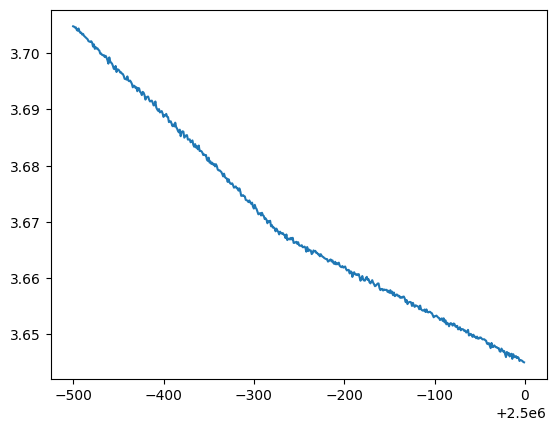

In [73]:
df_dataset_0['voltage'].iloc[-500:].plot()

In [33]:
error_NON_evolutive = np.abs(df_dataset_0['voltage'].iloc[-100000:].values - df_ground_faulty_voltage['voltage'].iloc[-100000:].values)
error_evolutive = np.abs(voltage_dt_5.iloc[-100000:].values - df_ground_faulty_voltage['voltage'].iloc[-100000:].values)
fs = 1000  # Define your sampling frequency
time_vector = np.linspace(0, len(error_NON_evolutive) / fs, len(error_NON_evolutive))

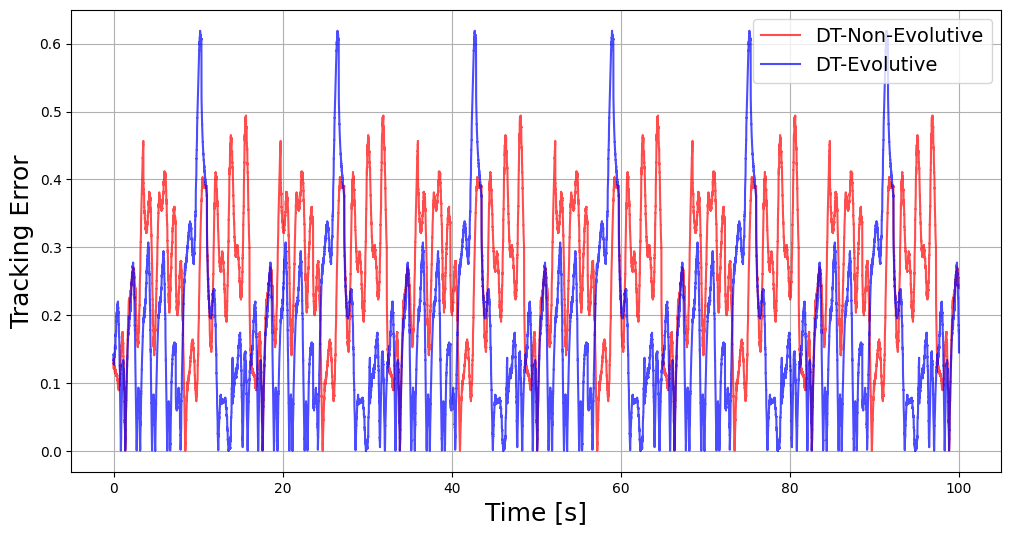

In [34]:
# Creating the plot
plt.figure(figsize=(12, 6))
plt.plot(time_vector, error_NON_evolutive,color='red', label='DT-Non-Evolutive', alpha=0.7)
plt.plot(time_vector, error_evolutive,color='blue', label='DT-Evolutive', alpha=0.7)
plt.xlabel('Time [s]', fontsize=18)
plt.ylabel('Tracking Error', fontsize=18)
plt.legend(fontsize=14)
plt.grid()
plt.savefig('errors_comparison.png', format='png')
plt.show()